In [1]:
#imports
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox #from notes to plot images in row

In [2]:
data = cifar10
(xTrain, yTrain), (xTest, yTest) = data.load_data() #data not normalized, just loaded

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
#initializing the model and adding appropriate layers
model = Sequential()
model.add(Input(shape = (32, 32, 3)))
model.add(layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))) #resizes the images to expected size

en = keras.applications.EfficientNetB0(include_top = False, weights = "imagenet") #only using convolutional layers
en.trainable = False #freezing weights of pre-trained layer
model.add(en)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.15))

#setting the optimizer and compiling model as per lecture notes colab
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [4]:
features = en.predict(xTest) #getting the output vectors from EN layer

313/313 [==============================] - 20s 52ms/step


In [5]:
features = features.reshape(features.shape[0], features.shape[3]) #reshaping for use in tSNE
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 300) #these hyperparams yield decent grouping
tsne.fit(features)

TSNE(n_iter=300, perplexity=30)

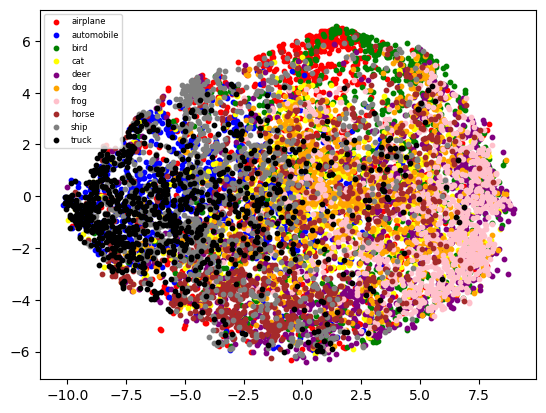

In [6]:
tsneX = tsne.embedding_

#labels and corresponding colors for ease of use in plotting
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', \
          'dog', 'frog', 'horse', 'ship', 'truck']
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', \
          'pink', 'brown', 'gray', 'black']

for i in range(len(labels)):
  plt.scatter(tsneX.T[0][yTest.ravel() == i], tsneX.T[1][yTest.ravel() == i], \
             c = colors[i], s = 10, label = labels[i]) #plotting reduced data

plt.legend(fontsize = 6) #showing the legend
plt.show()

In [7]:
#plotting function from lecture notes (takes quite a while with this much data)
def plotAtPoint(im, xy, zoom = 1):
  dxy = np.random.rand(2) / 100 * plt.ylim()
  plt.arrow(*xy, *dxy)
  ab = AnnotationBbox(OffsetImage(im, zoom = zoom), xy + dxy, frameon = False)
  plt.gca().add_artist(ab)

plt.figure(figsize = (40, 40)) #larger figure easier to see
plt.scatter(tsneX.T[0], tsneX.T[1]) #initial scatter plot

for im, xy in zip(xTest, tsneX):
  plotAtPoint(im, xy, 1.0) #plotting images on scatter points

Output hidden; open in https://colab.research.google.com to view.